# Lecture 14 - Searching

## Overview, Objectives, and Key Terms
 
In this lecture and [Lecture 15](ME400_Lecture_15.ipynb), we tackle two of the most important practical problems in computing: *searching* and *sorting*.  We'll start with *searching* in this lecture because it is the simpler problem, but efficient searching depends on sorted values.  Along the way, algorithms will be classified by their *order*, a way to describe how good (or bad) an algorithm is for problems of different sizes.

### Objectives

By the end of this lesson, you should be able to

- Search an array of numbers using a linear search.
- Search an array of numbers using a binary search.
- Describe what is meant by order and use it to compare algorithms
- Perform simple, numerical experiments to confirm the order of an algorithm

### Key Terms

- linear search
- binary search
- `time.time()`
- numerical experiment
- order
- $\mathcal{O}$ (big-O) notation

## The Basic, Linear Search

A search algorithm solves the following problem: given a sequence of values, find the location of the element in the sequence equal to some value of interest.  If all we want is equality, then the order of the elements does not matter, and a simple solution is a **linear search** of the unsorted sequence.  Linear search algorithms represent the brute-force approach: search every element in the sequence, from one end to the other, until the match is found.  The algorithm can be summarized in pseudocode as follows:

```
"""Algorithm for linear search of an unsorted sequence"""
Input: a, n, v # sequence, number elements, value of interest
Set location = Not found
Set i = 0
While i < n
    If a[i] == v then
        Set location = i
        Break  # stealing an idea from the Python we've learned
Output: location
```

Searching requires that an expression line `a[i] == v` has meaning.  For `int`, `float`, and `str` values, it does.  For more complicated types, it might not be so obvious.  Are the lists `[1, 2, 3]` and `[2, 2, 2]` equal?  In total, no, but some elements are, and maybe that's what matters.


> **Exercise**: Implement this algorithm in Python and test with sequence `[2, 6, 1, 7, 3]` and value `7`.

One does not need to sort values before searching them with a linear search if *equality* is to be checked.  However, what if one wants to find (1) the location of an element in a sequence equal to some value or, if not found, (2) the location of the value that is closest to but less than the value of interest.  For this latter case, values need to be sorted.  Those algorithms will be studied next time, but an easy way to sort a sequence is with the `sorted()` function:

In [1]:
a = [2, 6, 1, 7, 3]
sorted(a)

[1, 2, 3, 6, 7]

Hence, we can modify somewhat the pseudocode to search sorted values and to find the first element equal to (or the first element greater than) a value of interest.

```
"""Algorithm for linear search of a sorted sequence"""
Input: a, n, v # sorted sequence, number elements, value of interest
Set location = n - 1
Set i = 0
While i < n 
    If a[i] >= v then
        Set location = i
        Break
    Set i = i + 1
Output: location
```

Lets implement this algorithm as a function:

In [2]:
def linear_search(a, v):
    """Search a sorted sequence for value v. Return nearest 
       index to right (or last position) if not found.
    """
    location = len(a) - 1
    i = 0
    while i < len(a):   
        if a[i] >= v:
            location = i
            break
        i += 1
    return location

Now, let's test it on a sorted array and search for a few values:

In [3]:
a = [1, 5, 8, 11, 18]
linear_search(a, 8) # expect 2

2

In [4]:
linear_search(a, 1) # expect 0

0

In [5]:
linear_search(a, 18) # expect 4

4

In [6]:
linear_search(a, 17) # expect 4 again

4

So far, so good.  Does it work for all values of `v`?

> **Exercise**: Produce a flow chart for the linear search algorithm (for sorted sequences).

> **Exercise**: Modify the `linear_search` algorithm to accept a third argument `compare`, which should be a function that accepts two arguments.  For a sequence `a` and value `v`, `compare(a[i], v)` should return `True` if `a[i]` is greater than or equal to `v` and `False` otherwise.  Test your modified search function with `compare = lambda x, y: x[1] > y[1]`,  `a = [(1, 2), (4, 3), (1, 9), (4, 11)]` and `v = (1, 9)`.

>> *Solution*:
>>
```python
def linear_search(a, v, compare=lambda x, y: x >= y):
    """Search a sorted sequence for value v. Return nearest 
       index to left if not found.
    """
    location = len(a) - 1
    i = 0
    while i < len(a):
        if compare(a[i], v):
            location = i
            break
        i += 1
    return location
# Now test it
a = [(1, 2), (4, 3), (1, 9), (4, 11)]
v = (1, 9)
result = linear_search(a, v, compare=lambda x, y: x[1] >= y[1])
```

## A Bit About Order

Why call linear search *linear*?  One reason might be that the process is pretty linear in that each element is checked one after another (i.e., no skipping around the elements to find the proverbial needle).  Another reason is that the number of times elements have to be compared (i.e., the number of times `a[i] > v` is evaluated) is proportional (and, in the worst, case *equal*) to the number of elements.  Any time we have a proportional relationship, that relationship is *linear*.  The familiar $y = ax + b$ is linear, because $y$ varies linearly with $x$.  For an array of $n$ elements, the number of comparisons is linear with $n$.  The exact number of comparisons depends on the value for which one is searching and the sequence of values.

Generically, this linear relationship is given the fancy name *order $n$*, written compactly in the [big O](https://en.wikipedia.org/wiki/Big_O_notation) notation $\mathcal{O}(n)$.  Quite frequently, the computational cost of an algorithm (i.e., how long it takes to run) is directly proportional to its order.  Hence, the time it takes for linear search to find its match should grow, roughly linearly, with the number of elements being searched.

This fact may be intuitive, but it's always nice to see things demonstrated.  Here's what we'll do.  We'll write a little loop that goes from $n = 10$ to $n = 10^6$.  At each size of $n$, we'll draw a random number from 1 to $10^6$ and search for it in the `np.arange(1, n+1)`, a sorted sequence for sure.  For each step, we'll time things.  All together, these steps form the basis for a **numerical experiment**.  Here it all is:

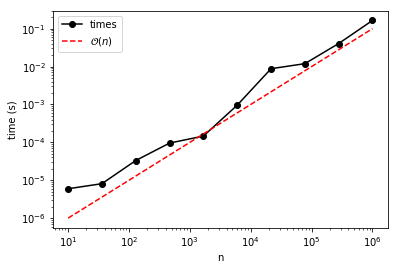

In [7]:
"""Program to show time as a function of size for linear search."""
from time import time
import numpy as np
import matplotlib.pyplot as plt

# Set the seed to keep the output fixed
np.random.seed(12345)

# Set the n values and initialize a list for times
n_values = np.logspace(1, 6, 10)
t_values = []

for n in n_values:
    n = int(n)
    # Generate the array 1, 2, ..., n
    a = np.arange(1, n+1)
    # Get a random int from [1, n]
    v = np.random.randint(1,n+1)
    # Start the timer
    t_start = time()
    # Do the search
    location = linear_search(a, v)
    # Determine the elapsed time (in seconds) and save it
    t_elapsed = time() - t_start
    t_values.append(t_elapsed)
    
# Plot the times vs values on a log log plot.
# Also, an expected "trend" line is included.
plt.figure(1)
plt.loglog(n_values, t_values, 'k-o', label='times') 
plt.loglog(n_values, 1e-7*n_values, 'r--', label='$\mathcal{O}(n)$')
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.show()

Based on the figure, the times are not perfectly linear with $n$, but then again, the experiment is based on searching for a random value (which could be at the very beginning or the very end of the sorted array).  A more complete approach would be to do the search *at each $n$ several times* and average the resulting elapsed times.

> **Exercise**: Modify the program above so that five different values of `v` are selected for each value of `n`.  Then, average the times and plot the results.

Such **numerical experiments** based on randome numbers are great ways to explore the behavior of algorithms for a variety of inputs.  

## Binary Search

**Linear search** is easy to understand and easy to implement, but it is not the fastest way to search, and it's probably not what you use when searching ordered data.  

Think about real-life scenarios in which ordered data is searched by hand.  One such scenario is when looking up a word in a dictionary (an actual, dead-tree book, not the website with the search tool).  Surely, you don't flip through, page by page, from "a" to "z," until the item is found.  Rather, you likely take a large jump to the letter of interest (a bonafide search algorithm for things organized into smaller collections like alphabetized words).  If you're like me, you then quickly identify a page near to but *before* the one of interest and a page near to but *after* the one of interest.  Next, you check some page between those.  If it contains the word of interest, great, your job is done.  If it is before (or after) the word of interest, you have just reduced the number of pages to search by about two.

The process just described is the basic idea of **binary search**: always divide the search domain in half.  One can consider binary search to be the simplest of **divide and conquer** techniques.  [Lecture 15](ME400_Lecture_15.ipynb) will show how divide and conquer applies to the problem of sorting.

### The basic algorithm

For a sorted sequence `a` of `n` values, a simple, binary search algorithm is defined by the following pseudocode:

```octave
"""Algorithm for binary search of a sorted sequence"""
Input: a, n, v # Sorted sequence, number elements, value of interest

# Initialize the location
Set location = Not Found
# Set the left and right search bounds
Set L = 0           
Set R = n - 1
While L <= R
    # Set the central point (use integer division!)
    Set C = (L + R) // 2 
    If v == a[C] then
        # Our search is successful, so we set
        # the location and call it quits early.
        Set location = C
        Break
    If v < a[C] then
        # V is in the first half of a[L:R],
        # so modify the right bound
        Set R = C - 1
    If v > a[C] then
        # V is in the second half of a[L:R]
        # so modify the left bound
        Set L = C + 1
```

This algorithm is substantially more complex than linear search.  Notice what happens at each step: either (1) the value `v` is found or (2) one of the bounds (`L` or `R`) are changed, reducing the range to be searched by half.


> **Exercise**: Step through this algorithm for `a = [1, 3, 7, 9, 11]` and `v = 3`.  We know that `L = 0` and `R = 4` before the loop begins.  What are `L` and `R` after one time through the loop?  Twice?  Three times?  If it helps, you can add `Set counter = 0` before the `While` and increment it.  Then, trace the values of `counter`, `L`, `R`, and `C` at each iteration.

> **Exercise**: Do the same for `v = 2` (which is not in `a`).

> **Exercise**: Develop a flowchart for the binary search algorithm shown above in pseudocode.


### Back to Order

Linear search is $\mathcal{O}(n)$, i.e., order $n$.  Binary search is faster.  It requires fewer comparisons.  Think about it this way: apply both search algorithms to find `9` in `[1, 3, 7, 9, 11]`.  At each step, the elements left to search are as follows (where the bolded entry indicates the element is found at that step):

| Step  | Linear              |  Binary             |
|-------|---------------------|---------------------|
| 0     | `[1, 3, 7, 9, 11]`  |  `[1, 3, 7, 9, 11]` |
| 1     | `[3, 7, 9, 11]`     |  **[9, 11]**        |
| 2     | `[7, 9, 11]`        |                     |
| 3     | **[9, 11]**         |                     |


Here, it appears binary search outperforms linear search by about a factor of two, but in general it is *much better*.  In fact, binary search is $\mathcal{O}(\log n)$.  More specifically, the number of comparisons required is proportional to $\log_2 n$, but remember that $\log_x n = \alpha \log_y n$ for $\alpha = \log_x(y)$.  How *much* better is $\mathcal{O}(\log n)$ than $\mathcal{O}(n)$? 

In [8]:
for n in np.logspace(1, 6, 6) :
    print("For n = {:7.0f}, binary is better by about a factor of {:.1e}".format(n, n/np.log(n)))

For n =      10, binary is better by about a factor of 4.3e+00
For n =     100, binary is better by about a factor of 2.2e+01
For n =    1000, binary is better by about a factor of 1.4e+02
For n =   10000, binary is better by about a factor of 1.1e+03
For n =  100000, binary is better by about a factor of 8.7e+03
For n = 1000000, binary is better by about a factor of 7.2e+04


That's a huge savings when $n$ is greater than about 10!  The savings just get better with larger $n$.

> **Exercise**: Implement the binary search algorithm above as a Python function `binary_search_basic`.

> **Exercise**:  Implement a *modified* binary search algorithm in Python as a function `binary_search` that returns the location of the element nearest to but less than `v` when `v` is not found.

> **Exercise**: Repeat the numerical experiment performed above using `binary_search` in place of `linear_search`.  Make sure to replace the trend line with what you expect.

> **Exercise**: Implement the binary search function using recursion.

## A Comment on Built-In Functions

Given `a = [1, 3, 7, 9, 11]`, Python already has a way to find the location of `v = 9`:

In [9]:
a = [1, 3, 7, 9, 11]
a.index(9)

3

In [10]:
help(a.index)

Help on built-in function index:

index(...) method of builtins.list instance
    L.index(value, [start, [stop]]) -> integer -- return first index of value.
    Raises ValueError if the value is not present.



In [11]:
a.index(2)

ValueError: 2 is not in list

The `index` function does not require that the elements of `a`  be sorted:

In [12]:
[3, 11, 7, 9, 1].index(9)

3

Based on the documentation, it's not clear what sort of search is powering the `index` function.  You could dig in to the underlying code, or you could try a numerical experiment!

> **Exercise**:  Adapt the numerical experiment above to determine whether the `index` function is linear or binary.  Does its behavior change if `a` is unsorted?  

## Further Reading

None at this time.